In [2]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Archivo a cargar
datos=pd.read_csv(r'C:\Users\Itzel Zamorano\Documents\Diplomado\Python\first_5k.csv',parse_dates=[7])

In [4]:
# Se encontraron que tenemos 15 columnas de las 13 son string y sólo 3 son númericas.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999999 entries, 0 to 4999998
Data columns (total 15 columns):
producto           object
presentacion       object
marca              object
categoria          object
catalogo           object
precio             float64
fechaRegistro      object
cadenaComercial    object
giro               object
nombreComercial    object
direccion          object
estado             object
municipio          object
latitud            float64
longitud           float64
dtypes: float64(3), object(12)
memory usage: 572.2+ MB


In [5]:
# Se hizo una descripción estadística de las variables numéricas
datos.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,precio,latitud,longitud
count,4.999999e+06,4.772308e+06,4.772308e+06
mean,4.719949e+02,2.067859e+01,-9.972081e+01
std,1.876400e+03,2.287266e+00,4.206325e+00
min,4.500000e-01,1.703943e+01,-1.110115e+02
25%,1.490000e+01,NaN,NaN
50%,3.160000e+01,NaN,NaN
75%,1.000000e+02,NaN,NaN
max,9.999900e+04,2.914444e+01,-8.682410e+01


In [6]:
# Se encontraron que tenemos variables que no cuentan información 
datos.isnull().sum()

producto                0
presentacion            0
marca                   0
categoria               0
catalogo              119
precio                  0
fechaRegistro           0
cadenaComercial         0
giro                    0
nombreComercial         0
direccion               0
estado                134
municipio             134
latitud            227691
longitud           227691
dtype: int64

In [7]:
# Las dimensiones de la base es la siguiente como anteriormente vimos son de 15 Columnas
datos.shape

(4999999, 15)

In [8]:
# Se hizo la transformación de la fecha de string a num
datos['fecha']=pd.to_datetime(datos.fechaRegistro)

In [9]:
# Se obtine los meses en una nueva columna
datos['mes']=[element.month for element in datos['fecha']]

In [10]:
# Se hace una acotación por categoría por fecha
datos[['categoria','producto','fecha','mes']].head()

,categoria,producto,fecha,mes
0,MATERIAL ESCOLAR,CUADERNO FORMA ITALIANA,2011-05-18,5
1,MATERIAL ESCOLAR,CRAYONES,2011-05-18,5
2,MATERIAL ESCOLAR,CRAYONES,2011-05-18,5
3,MATERIAL ESCOLAR,COLORES DE MADERA,2011-05-18,5
4,MATERIAL ESCOLAR,COLOR LARGO,2011-05-18,5


In [11]:
# Se obtine los días en otra columna
datos['dia']=[element.day for element in datos['fecha']]

In [12]:
# Se sacan los meses
datos.mes.unique()

array([ 5,  1,  2,  3,  6,  8,  9, 10, 11,  4,  7, 12], dtype=int64)

In [13]:
# Se sacan los días y se puede ver que no se encuentran todos los días hay un corte de 3-9
datos.dia.unique()

array([18, 10,  1, 11, 12, 13, 14, 15, 16, 17, 19, 20,  2, 21, 22, 23, 24,
       25, 26, 27], dtype=int64)

In [85]:
# Fechas no todos los meses cuentan con todos los días 
C2=pd.DataFrame({'mes':datos['mes'],'dia':datos['dia']})

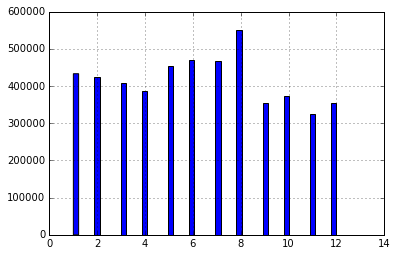

In [86]:
# Frecuencia por mes
datos['mes'].dropna().astype(int).hist(bins=50)

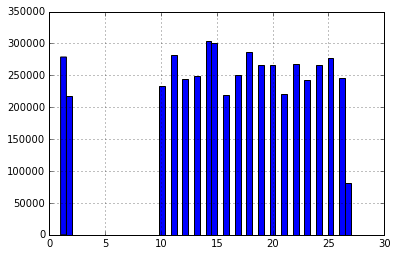

In [87]:
# Frecuencia por día
datos['dia'].dropna().astype(int).hist(bins=50)

In [88]:
# Se obtuvieron las categorias por mes 
C0=pd.DataFrame({'categoria':datos['categoria'],'mes':datos['mes'],'dia':datos['dia']})
C0.drop_duplicates()

,categoria,dia,mes
0,MATERIAL ESCOLAR,18,5
9,PAN,10,1
10,GALLETAS PASTAS Y HARINAS DE TRIGO,10,1
15,ARTS. PARA EL CUIDADO PERSONAL,10,1
16,APARATOS ELECTRICOS,10,1
23,ARTS. DE PAPEL P/HIGIENE PERSONAL,10,1
29,MEDICAMENTOS,10,1
34,PRODUCTOS DE TEMPORADA (NAVIDEÐOS),10,1
41,APARATOS ELECTRONICOS,10,1
42,ACCESORIOS DOMESTICOS,10,1


In [29]:
# Precios a través del año
pv1=pd.pivot_table(datos,index=['fechaRegistro'],columns=['producto'],values=['precio'])

In [34]:
# La diferencia de los precios a lo largo del año por producto 
pv1.precio.max()-pv1.precio.min()

producto
ABILIFY                             438.270000
ACEITE                                6.516841
ACEITE DE OLIVA                      13.066479
ACEITUNA                             11.400000
ACEITUNA. GORDAL                     25.674444
ACEITUNA. MANZANILLA                 14.953333
ACEITUNA. RELLENA CON PIMIENTO       24.242857
ACELGA                                3.280250
ACLORAL                              41.680000
ACONDICIONADOR / ENJUAGUE             6.733333
ACONDICIONADOR Y ENJUAGUE             4.762121
ACTIFED                              25.501667
ACULAREN                            120.160000
ADEL                                111.700000
ADEROGYL C                           28.100000
ADVIL                                16.600000
AEROFLUX                             84.700000
AFRINEX ACTIVE                       17.283333
AFUNGIL                              71.445000
AGUA CON GAS                         11.125000
AGUA SIN GAS                          1.861948
AGUA

In [102]:
# Tendencia de los precios por mes para cada categoría
pd.pivot_table(datos,index=['mes'],columns=['categoria'],values=['precio'])

precio                                    \
categoria ACCESORIOS DOMESTICOS ACEITES Y GRASAS VEG. COMESTIBLES   
mes                                                                 
1                     34.106014                         23.635665   
2                     32.806274                         25.022883   
3                     33.868643                         25.695114   
4                     36.452886                         25.536186   
5                     35.707124                         26.880169   
6                     35.220278                         27.016092   
7                     42.960144                         26.549669   
8                     46.843385                         26.411433   
9                     49.474969                         26.279484   
10                    49.076891                         26.357364   
11                    49.169841                         26.780728   
12                    50.557582                         27.241986   

                                                     \
categoria APARATOS ELECTRICOS APARATOS ELECTRONICOS   
mes                                                   
1                 2618.732637           6086.050526   
2                 2563.881153           5972.978557   
3                 2535.491123           5777.043034   
4                 2375.057040           5262.944240   
5                 2618.321312           5512.331738   
6                 2620.218321           5633.509843   
7                 2624.828677           5705.820702   
8                 2683.980296           5832.159199   
9                 2676.347676           5760.153764   
10                2673.801653           5471.485319   
11                2728.298816           5263.064411   
12                2867.025718           5227.050414   

                                                                         \
categoria ARROZ Y CEREALES PREPARADOS ARTS. DE ESPARCIMIENTO (JUGUETES)   
mes                                                                       
1                           24.017251                        653.151261   
2                           23.843818                               NaN   
3                           23.895117                               NaN   
4                           24.348517                               NaN   
5                           25.445162                               NaN   
6                           26.508452                               NaN   
7                           26.533250                               NaN   
8                           26.639067                               NaN   
9                           26.867940                               NaN   
10                          26.353877                        498.962176   
11                          27.279925                        546.497907   
12                          27.688664                        565.239008   

                                                                            \
categoria ARTS. DE PAPEL P/HIGIENE PERSONAL ARTS. PARA EL CUIDADO PERSONAL   
mes                                                                          
1                                 47.737937                      33.578255   
2                                 46.538018                      33.575817   
3                                 46.077182                      33.334270   
4                                 45.740008                      33.103615   
5                                 45.089847                      32.696536   
6                                 46.371079                      33.235301   
7                                 46.815017                      32.788403   
8                                 46.118548                      32.214314   
9                                 46.312091                      31.773069   
10                                45.747084                      31.752070   
11                     

In [104]:
# Tendencia de los precios por mes para cada producto
pd.pivot_table(datos,index=['mes'],columns=['producto'],values=['precio'])

precio                                                         \
producto     ABILIFY     ACEITE ACEITE DE OLIVA   ACEITUNA ACEITUNA. GORDAL   
mes                                                                           
1         748.554597  26.121068       78.638045  24.591947        81.004515   
2         753.152327  27.639008       78.115626  24.049051        81.462965   
3         744.664706  28.656387       75.985113  23.677070        82.400120   
4         746.641302  28.824812       76.059131  24.330193        83.871579   
5         751.036866  29.327442       75.523428  25.246455        87.293462   
6         744.888861  30.040361       76.580659  25.182592        85.871681   
7         748.502061  30.181051       74.923265  25.297732        85.474935   
8         745.162012  30.229490       73.586222  24.883688        86.177595   
9         750.250643  30.080188       74.486402  24.448962        85.911623   
10        750.104034  30.028403       73.518520  23.846112        86.832881   
11        766.541955  30.692190       71.951354  22.161945        88.152149   
12        748.699255  31.303950       70.378042  21.949879        86.308767   

                                                                        \
producto ACEITUNA. MANZANILLA ACEITUNA. RELLENA CON PIMIENTO    ACELGA   
mes                                                                      
1                   61.417118                      92.250478  5.193661   
2                   60.501810                      93.371154  4.882337   
3                   60.025249                      94.028469  4.669707   
4                   59.931889                      93.949321  4.898805   
5                   59.909551                      94.562500  5.143878   
6                   59.528227                      94.717216  4.840891   
7                   59.042948                      93.233984  5.012453   
8                   59.258090                      94.561481  5.239539   
9                   59.637312                      95.868539  5.036066   
10                  59.063463                      95.374752  4.905439   
11                  62.242109                     100.067647  5.027969   
12                  63.590118                     100.410843  5.426953   

                                                   ...                  \
producto    ACLORAL ACONDICIONADOR / ENJUAGUE      ...       ZANAHORIA   
mes                                                ...                   
1         74.995585                 40.736096      ...       11.370000   
2         74.944411                 40.063726      ...       14.675509   
3         75.958704                 39.660387      ...       14.157717   
4         75.423714                 39.881488      ...        9.254915   
5         75.435506                 39.122729      ...        7.647368   
6         75.474669                 39.394552      ...        7.327129   
7         76.084714                 39.232483      ...        7.687323   
8         76.317328                 37.750442      ...        7.792851   
9         75.553660                 36.909246      ...        8.575924   
10        75.228876                 37.990563      ...        9.594589   
11        75.238413                 38.972720      ...        9.119169   
12        76.074413                 39.715063      ...        8.612139   

                                                                             \
producto     ZENTEL     ZESTRIL      ZINNAT     ZOVIRAX ZOVIRAX DISPERSABLE   
mes                                                                           
1         91.662893  278.130575  423.520357  181.559112         1612.753307   
2         91.382695  280.901516  422.546448  182.715251         1607.280253   
3         95.535551  282.550263  418.224846  182.876926         1592.835802   
4         98.860136  283.573966  421.491142  179.620085         1599.662582   
5         98.714630  281.385000  417.841029  180.2141

In [106]:
''' Se saco en una nueva matriz la categoria, producto, precio. De ahí se sacaron los precios máximos y mínimos 
para la obtención de la diferencia máxima y mínima de los productos '''
C1=pd.DataFrame({'categoria':datos['categoria'],'producto':datos['producto'],'precio':datos['precio']})
diff=C1.groupby(['categoria','producto']).precio.max()-C1.groupby(['categoria','producto']).precio.min()

In [13]:
# Se obtuvo la diferencia máxima por categoría y producto
diff.loc[diff==diff.max()]

categoria              producto   
APARATOS ELECTRONICOS  TELEVISORES    99201.0
Name: precio, dtype: float64

In [14]:
# La diferencia mínima
diff.loc[diff==diff.min()]

categoria                           producto  
PESCADOS Y MARISCOS                 ANGULA        0.0
                                    BOQUERON      0.0
                                    OSTION        0.0
                                    SARGO         0.0
                                    TIBURON       0.0
PRODUCTOS DE TEMPORADA (NAVIDEÐOS)  PELADILLAS    0.0
Name: precio, dtype: float64

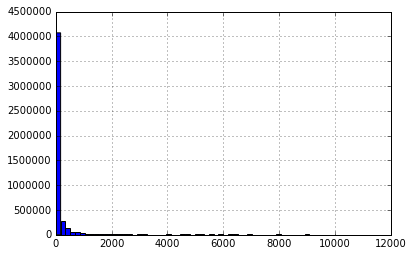

In [38]:
# Se saco el histograma de los precios la cual tiene una distribución acotada a la izquierda
datos['precio'].dropna().astype(int).hist(bins=70, range=[0,12000])

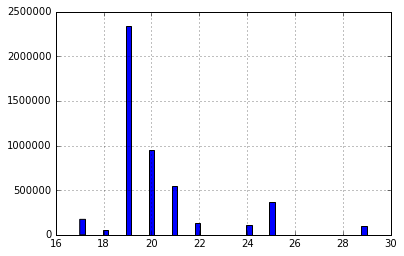

In [103]:
# El histograma de latitud es poco debido a que tiene muchos datos faltantes 
datos['latitud'].dropna().astype(int).hist(bins=50)

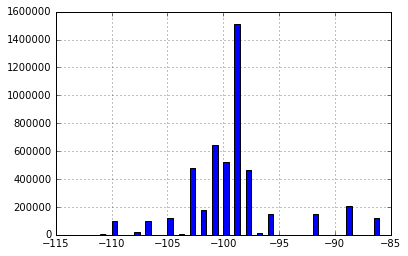

In [40]:
# El histograma de la longitud con pocos datos debido a que faltan muchos datos
datos['longitud'].dropna().astype(int).hist(bins=50)

In [41]:
# Debido a que los precios tienen un comportamiento extraño se le saco la descripción para ver un poco de su varianza 
datos.precio.describe()

count    4.999999e+06
mean     4.719949e+02
std      1.876400e+03
min      4.500000e-01
25%      1.490000e+01
50%      3.160000e+01
75%      1.000000e+02
max      9.999900e+04
Name: precio, dtype: float64

In [42]:
''' Se transformo la variable de precio debido a que tiene mucha dispersión por lo que se le aplico una tranformación 
logarítmica para poder conjuntar más los datos'''
precios=np.log10(datos.precio)

{'boxes': [<matplotlib.lines.Line2D at 0x1556d3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x164cf080>,
 'fliers': [<matplotlib.lines.Line2D at 0x164dd128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x164cfb70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1556d4e0>,
  <matplotlib.lines.Line2D at 0x1556dac8>]}

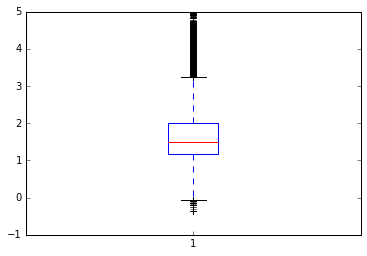

In [43]:
plt.boxplot(precios)

In [44]:
# Se saco la descripción de la latitud para ver como se comportaban los datos 
datos.latitud.describe()

count    4.772308e+06
mean     2.067859e+01
std      2.287266e+00
min      1.703943e+01
25%               NaN
50%               NaN
75%               NaN
max      2.914444e+01
Name: latitud, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x181a3048>],
 'caps': [<matplotlib.lines.Line2D at 0x1c06b630>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c07b898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c07b748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x164f7630>,
  <matplotlib.lines.Line2D at 0x1c06b8d0>]}

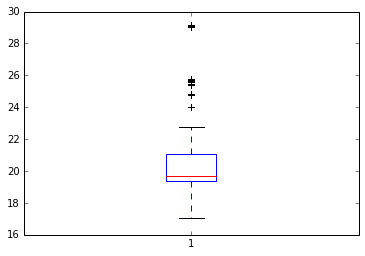

In [50]:
latitud=datos.latitud.dropna()
plt.boxplot(latitud)

In [29]:
# Se obtuvo la descripción de la longitud 
datos.longitud.describe()

count    4.772308e+06
mean    -9.972081e+01
std      4.206325e+00
min     -1.110115e+02
25%               NaN
50%               NaN
75%               NaN
max     -8.682410e+01
Name: longitud, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1b0572b0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b057f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b065fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b065a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b0573c8>,
  <matplotlib.lines.Line2D at 0x1b0579b0>]}

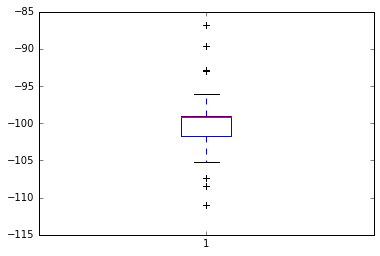

In [51]:
longitud=datos.longitud.dropna()
plt.boxplot(longitud)